<a href="https://colab.research.google.com/github/nklsrmy/CCADMACL_PROJECT/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
# Load dataset
df = pd.read_csv("coffee_house.csv")

In [3]:
# Dataset Exploration
print("Dataset Overview:\n", df.head())
print("\nDataset Info:\n")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Dataset Overview:
                       Timestamp 1. Your Gender    2. Your Age  \
0  2019/10/01 12:38:43 PM GMT+8         Female  From 20 to 29   
1  2019/10/01 12:38:54 PM GMT+8         Female  From 20 to 29   
2  2019/10/01 12:38:56 PM GMT+8           Male  From 20 to 29   
3  2019/10/01 12:39:08 PM GMT+8         Female  From 20 to 29   
4  2019/10/01 12:39:20 PM GMT+8           Male  From 20 to 29   

  3. Are you currently....? 4. What is your annual income?  \
0                   Student             Less than RM25,000   
1                   Student             Less than RM25,000   
2                  Employed             Less than RM25,000   
3                   Student             Less than RM25,000   
4                   Student             Less than RM25,000   

  5. How often do you visit Starbucks? 6. How do you usually enjoy Starbucks?  \
0                               Rarely                                Dine in   
1                               Rarely                 

In [4]:
# Rename columns to standardized names
df.columns = ['Gender', 'Age', 'Status', 'Income', 'Frequency', 'Method', 'timepervisit', 'nearest', 'membership',
              'fequencyofpurchase', 'spending', 'comparerate', 'pricerate', 'promotion', 'rateambiance', 'Wifi',
              'rateservice', 'situational', 'source', 'loyalty', 'extra_col']

In [5]:
df.isna().sum()

,0
Gender,0
Age,0
Status,0
Income,0
Frequency,0
Method,0
timepervisit,1
nearest,0
membership,0
fequencyofpurchase,0


In [6]:
# Encode categorical features
df['Status'].replace({'Employed': 2, 'Student': 1, 'Self-employed': 3, 'Housewife': 4}, inplace=True)
df['Income'].replace({'Less than RM25,000': 1, 'RM25,000 - RM50,000': 2, 'RM50,000 - RM100,000': 3, 'RM100,000 - RM150,000': 5, 'More than RM150,000': 4}, inplace=True)
df['spending'].replace({'Less than RM20': 2, 'Around RM20 - RM40': 3, 'Zero': 1, 'More than RM40': 4}, inplace=True)
df['loyalty'] = df['loyalty'].str.lower().replace({'yes': 1, 'no': 0})

<ipython-input-6-3f524243a651>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Status'].replace({'Employed': 2, 'Student': 1, 'Self-employed': 3, 'Housewife': 4}, inplace=True)
<ipython-input-6-3f524243a651>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [7]:
# Data Preprocessing: Handling missing values and scaling
# Select numeric columns for filling missing values
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean()) # Handle missing values for numeric columns only
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # Scale numeric columns

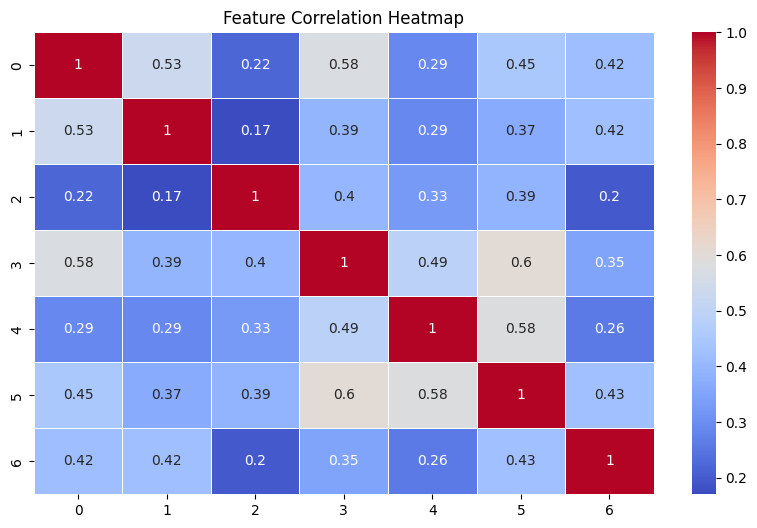

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(df_scaled).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=3)  # Keeping 3 components for 3D visualization
df_pca = pca.fit_transform(df_scaled)

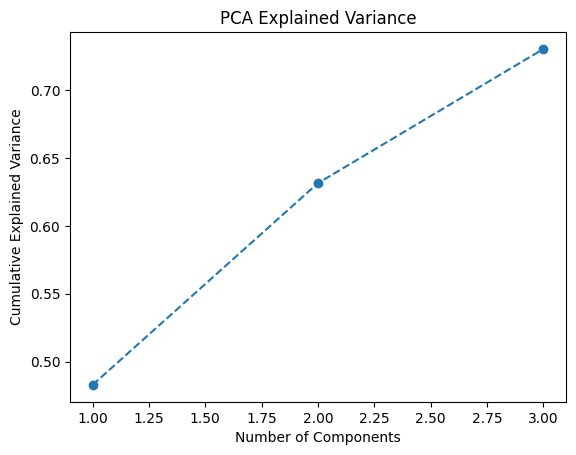

In [10]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 4), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

In [11]:
# Clustering: K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)
kmeans_silhouette = silhouette_score(df_pca, kmeans_labels)
kmeans_db = davies_bouldin_score(df_pca, kmeans_labels)
kmeans_ch = calinski_harabasz_score(df_pca, kmeans_labels)

In [12]:
# Clustering: Hierarchical
hierarchical = AgglomerativeClustering(n_clusters=5).fit(df_scaled)
hierarchical_labels = hierarchical.labels_
hierarchical_silhouette = silhouette_score(df_pca, hierarchical_labels)
hierarchical_db = davies_bouldin_score(df_pca, hierarchical_labels)
hierarchical_ch = calinski_harabasz_score(df_pca, hierarchical_labels)

In [13]:
# Alternative Clustering: Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(df_pca)
gmm_silhouette = silhouette_score(df_pca, gmm_labels)
gmm_db = davies_bouldin_score(df_pca, gmm_labels)
gmm_ch = calinski_harabasz_score(df_pca, gmm_labels)

In [14]:
# Evaluation Results
clustering_results = pd.DataFrame({
    'Clustering Method': ['K-Means', 'Hierarchical', 'GMM'],
    'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette, gmm_silhouette],
    'Davies-Bouldin Score': [kmeans_db, hierarchical_db, gmm_db],
    'Calinski-Harabasz Score': [kmeans_ch, hierarchical_ch, gmm_ch]
})
print("\nClustering Evaluation Metrics:\n", clustering_results)


Clustering Evaluation Metrics:
   Clustering Method  Silhouette Score  Davies-Bouldin Score  \
0           K-Means          0.249257              1.189311   
1      Hierarchical          0.171879              1.444401   
2               GMM          0.215728              1.168075   

   Calinski-Harabasz Score  
0                48.943358  
1                42.517138  
2                40.875498  


In [15]:
print("First 10 K-Means Labels:", kmeans_labels[:10])
print("First 10 Hierarchical Labels:", hierarchical_labels[:10])
print("First 10 GMM Labels:", gmm_labels[:10])

First 10 K-Means Labels: [0 0 0 4 4 0 2 4 0 1]
First 10 Hierarchical Labels: [0 4 4 3 3 0 0 3 0 1]
First 10 GMM Labels: [0 0 0 4 4 0 2 4 0 0]


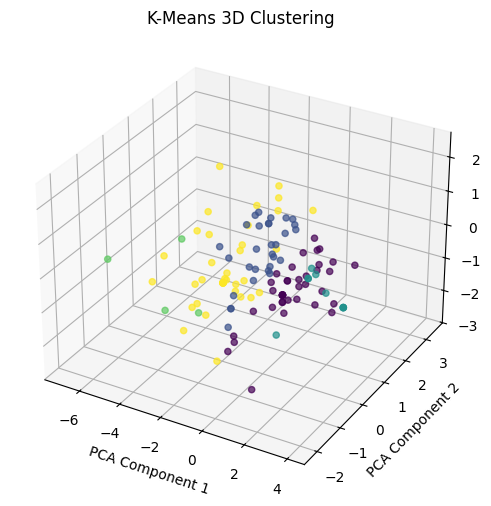

In [16]:
# 3D Visualization of Clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=kmeans_labels, cmap='viridis', alpha=0.7)
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('K-Means 3D Clustering')
plt.show()

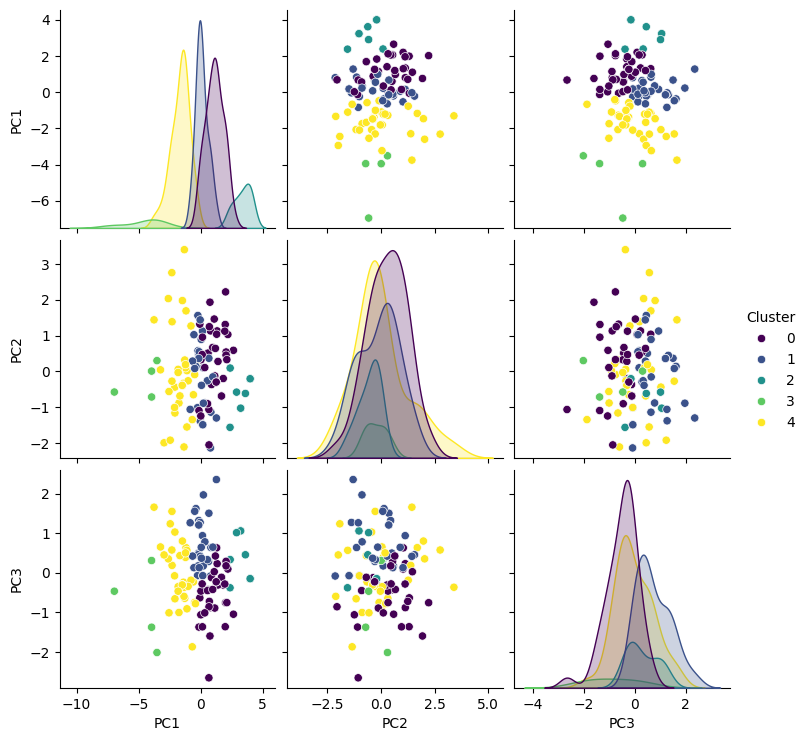

In [17]:
# Pairplot to Analyze PCA Components
sns.pairplot(pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3']).assign(Cluster=kmeans_labels), hue='Cluster', palette='viridis')
plt.show()

In [18]:
from sklearn.manifold import TSNE

# Convert to 2D space using t-SNE
df_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(df_scaled)

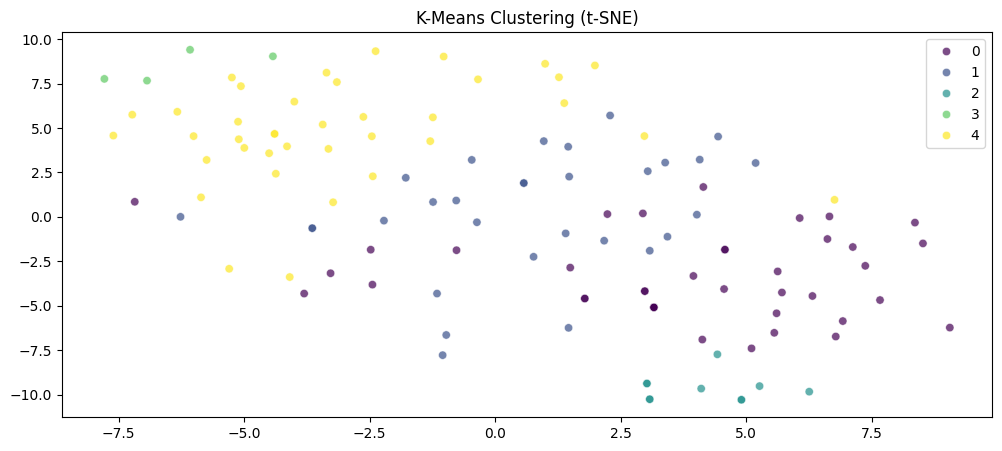

In [19]:
# Visualize K-Means with t-SNE
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_tsne[:, 0], y=df_tsne[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering (t-SNE)')
plt.show()

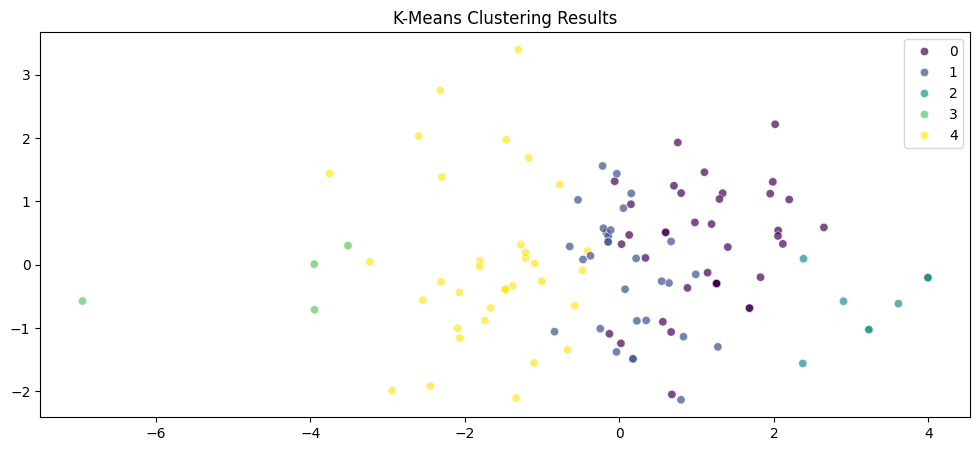

In [20]:
# Cluster Visualization (2D)
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.title('K-Means Clustering Results')
plt.show()

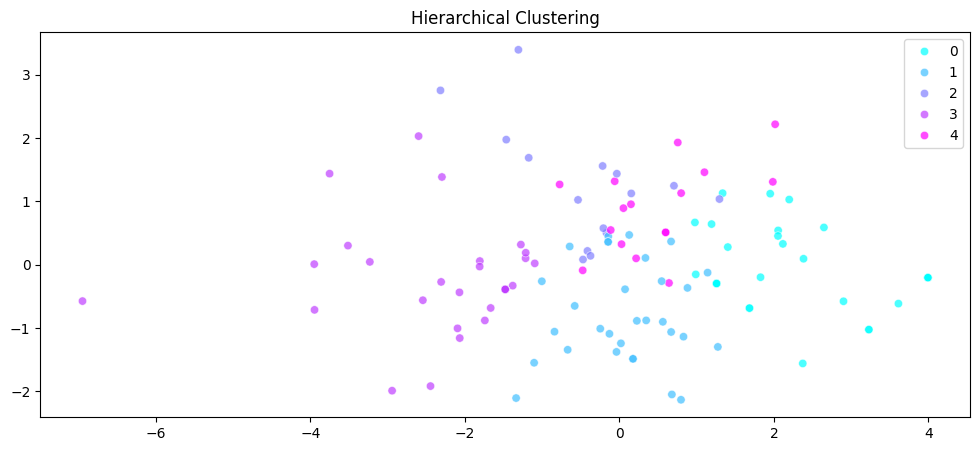

In [21]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=hierarchical_labels, palette='cool', alpha=0.7)
plt.title('Hierarchical Clustering')
plt.show()

In [22]:
from scipy.stats import mode

# Ensure GMM labels align with K-Means
mapped_labels = np.zeros_like(gmm_labels)

for i in range(5):  # Assuming 5 clusters
    mask = (gmm_labels == i)
    mapped_labels[mask] = mode(kmeans_labels[mask])[0]  # Assign most common K-Means label

gmm_labels = mapped_labels  # Update GMM labels

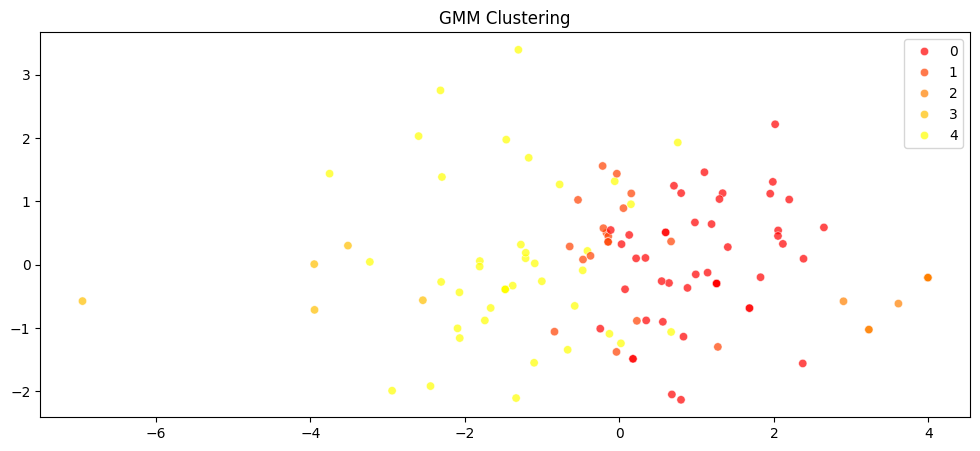

In [23]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=gmm_labels, palette='autumn', alpha=0.7)
plt.title('GMM Clustering')
plt.show()

In [24]:
# Summary of Clustering Performance
results = pd.DataFrame({
    'Clustering Method': ['K-Means', 'Hierarchical', 'GMM'],
    'Silhouette Score': [kmeans_silhouette, hierarchical_silhouette, gmm_silhouette]
})
print(results.sort_values(by='Silhouette Score', ascending=False))

  Clustering Method  Silhouette Score
0           K-Means          0.249257
2               GMM          0.215728
1      Hierarchical          0.171879
